In [1]:

library(cubature)
library(MASS)
library(pracma)
library(mvtnorm)

library(LogConcDEAD)
library(logcondens) 


Warning message:
“no DISPLAY variable so Tk is not available”


# Test new functionality!

In [48]:
source('lcic.r')

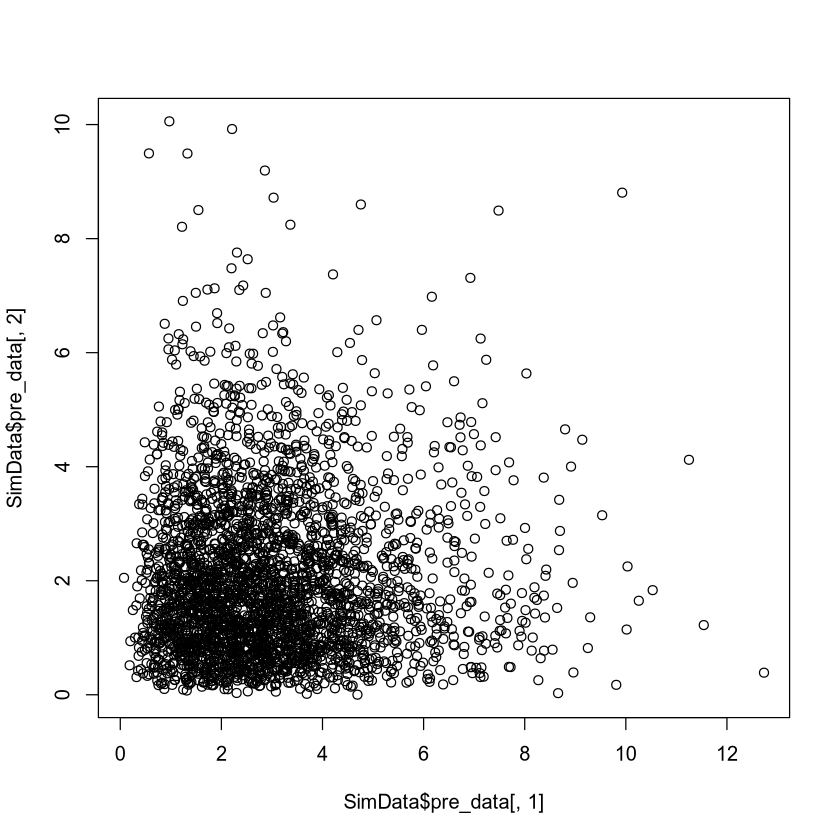

In [41]:
d = 2
n = 2000
# SimData <- get_heteroskedastic_gamma_data(d, n)
true_mean_vec <- rep(10,d) 
Sigma_max = 15

# SimData <- get_heteroskedastic_gaussian_data(d, n, true_mean_vec, Sigma_max=Sigma_max, eigensep=1)
SimData <- get_axis_aligned_heteroskedastic_gamma_data(d, n)

plot(x=SimData$pre_data[,1], y=SimData$pre_data[,2])

In [42]:
SimData$covariance_Z

3,0
0,2


[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2


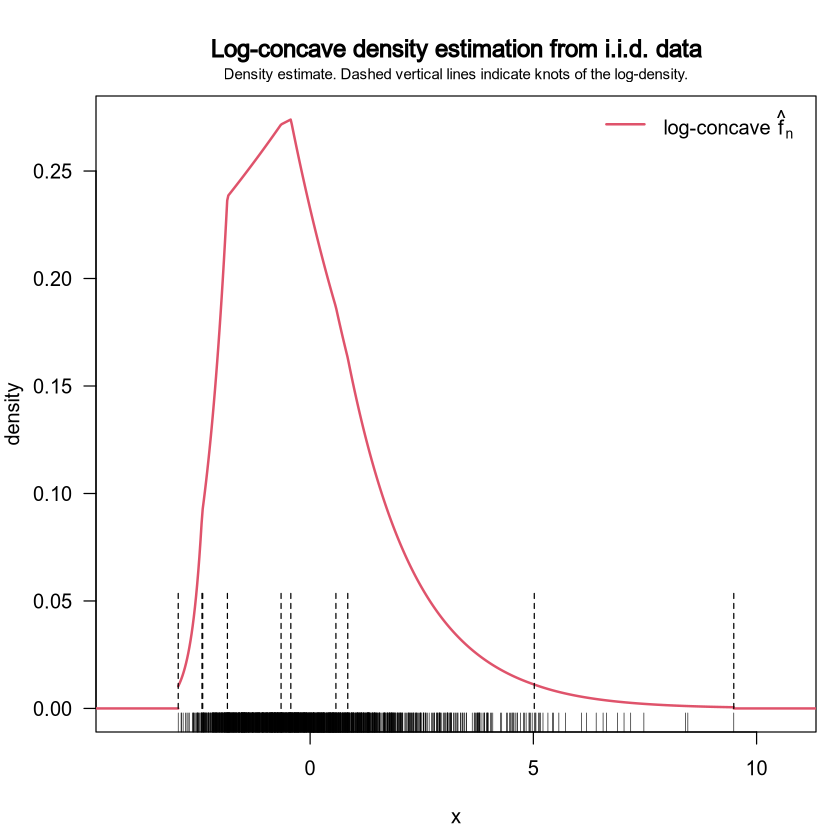

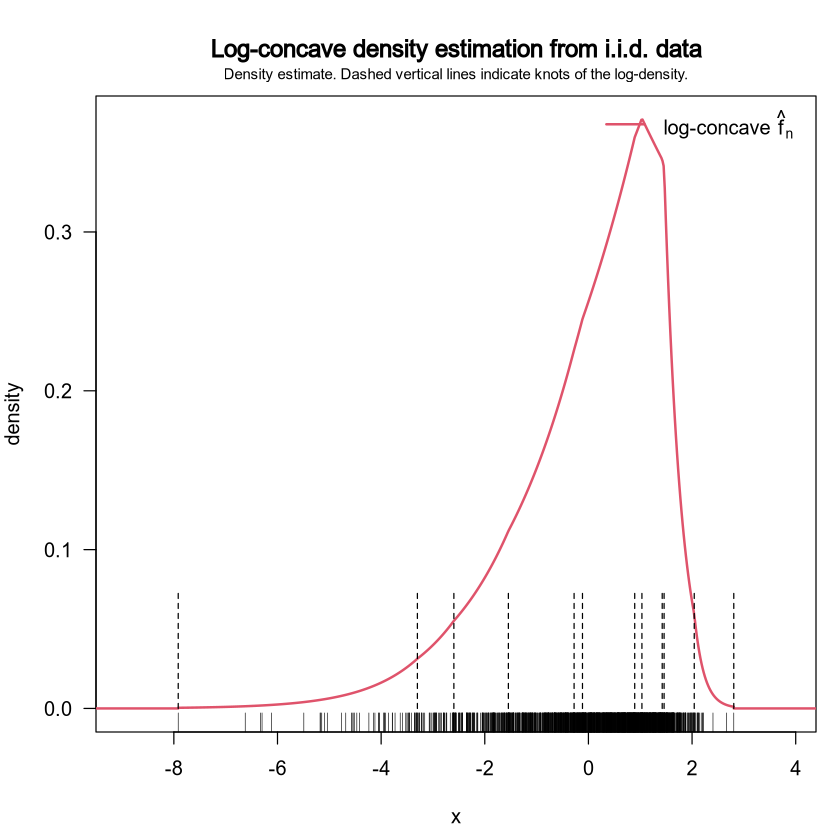

In [43]:
split_r = 0.5
my_estimator_logcondens <- generate_estimator_with_logcondens(SimData, r=split_r, plotting=TRUE)

In [44]:
ip_mat <- direction_inner_products(SimData, my_estimator_logcondens)
ip_mat

Comp.1,0.9928706,0.1191972
Comp.2,0.1191972,-0.9928706


In [20]:
# Assess error
hfun_logcondens <- function(X_samps){
    density_ratio <- evaluate_logcondens_estimator_vectorized(X_samps, my_estimator_logcondens)/heteroskedastic_gaussian_pdf_vectorized(X_samps, SimData)
    return(0.5*(sqrt(density_ratio)-1)^2)
}

generate_heteroskedastic_gaussian_samples_for_monte_carlo <- function(K_samps){
    return(mvrnorm(K_samps, mu=SimData$true_mean_vec, Sigma=SimData$covariance_X))
}

K_samps <- 10000
num_repeats_mc <- 50

hellinger_error_estimate_statistics_logcondens <- naive_monte_carlo_integrate_repeated(hfun_logcondens, 
                                                    generate_heteroskedastic_gaussian_samples_for_monte_carlo, K_samps, num_repeats_mc)


In [49]:
# Assess error
hfun_logcondens <- function(X_samps){
    density_ratio <- evaluate_logcondens_estimator_vectorized(X_samps, my_estimator_logcondens)/axis_aligned_heteroskedastic_gamma_pdf_vectorized(X_samps, SimData)
    return(0.5*(sqrt(density_ratio)-1)^2)
}

generate_heteroskedastic_gamma_samples_for_monte_carlo <- function(K_samps){
    opt_data = matrix(0, nrow=K_samps, ncol=d)
    for (dind in 1:d) {
        opt_data[,dind] <- rgamma(K_samps, shape=SimData$covariance_Z[dind,dind])
    }
    return(opt_data)
}

K_samps <- 10000
num_repeats_mc <- 50

hellinger_error_estimate_statistics_logcondens <- naive_monte_carlo_integrate_repeated(hfun_logcondens, 
                                                    generate_heteroskedastic_gamma_samples_for_monte_carlo, K_samps, num_repeats_mc)


In [50]:
hellinger_error_estimate_statistics_logcondens


$mean_val
[1] 0.007231544

$median_val
[1] 0.007151264

$sd_val
[1] 0.0004309341

$all_vals
 [1] 0.007776115 0.007406689 0.006996069 0.007070014 0.006981325 0.006999113
 [7] 0.007127622 0.006827696 0.007230517 0.007113606 0.007784213 0.006786266
[13] 0.006764329 0.007161681 0.007140848 0.008341435 0.006627540 0.007320842
[19] 0.006979714 0.006852188 0.007083461 0.007715543 0.007744615 0.006730548
[25] 0.006351885 0.007236082 0.007136008 0.008427046 0.007128235 0.006932740
[31] 0.007181076 0.006747610 0.007182588 0.008238570 0.007456527 0.007303553
[37] 0.007566036 0.007645786 0.007304576 0.007048089 0.006784980 0.007069210
[43] 0.007270804 0.006840893 0.007327458 0.007238114 0.007806857 0.006770156
[49] 0.007645902 0.007374435

In [78]:
xg <- seq(0, 8, by=.5)
yg <- xg

gridmat <- data.matrix(expand.grid(xg, yg))
gridmat

Var1,Var2
0.0,0.0
0.5,0.0
1.0,0.0
1.5,0.0
2.0,0.0
2.5,0.0
3.0,0.0
3.5,0.0
4.0,0.0
4.5,0.0


In [79]:
# z_vals_gt <- heteroskedastic_gaussian_pdf_vectorized(gridmat, SimData)
z_vals_gt <- axis_aligned_heteroskedastic_gamma_pdf_vectorized(gridmat, SimData)
z_vals_gt <- matrix(z_vals_gt, nrow=length(xg))

z_vals_estimated <- evaluate_logcondens_estimator_vectorized(gridmat, my_estimator_logcondens)
z_vals_estimated <- matrix(z_vals_estimated, nrow=length(xg))



[1]   1 441

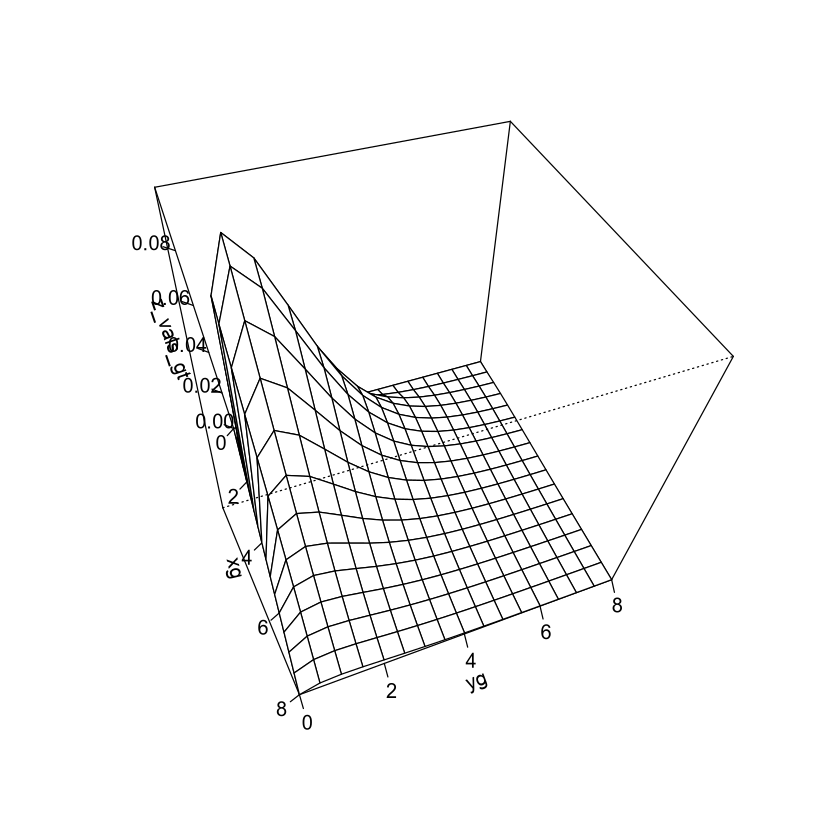

In [80]:
persp(xg, yg, z_vals_gt, theta=70, phi=50, ticktype="detailed")

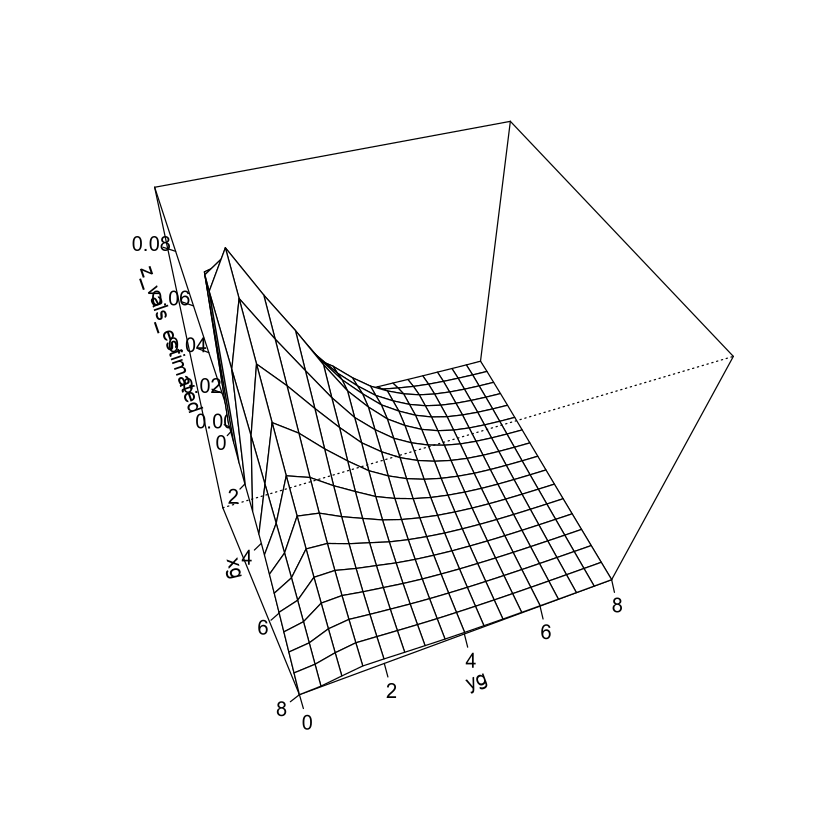

In [81]:
persp(xg, yg, z_vals_estimated, theta=70, phi=50, ticktype="detailed")

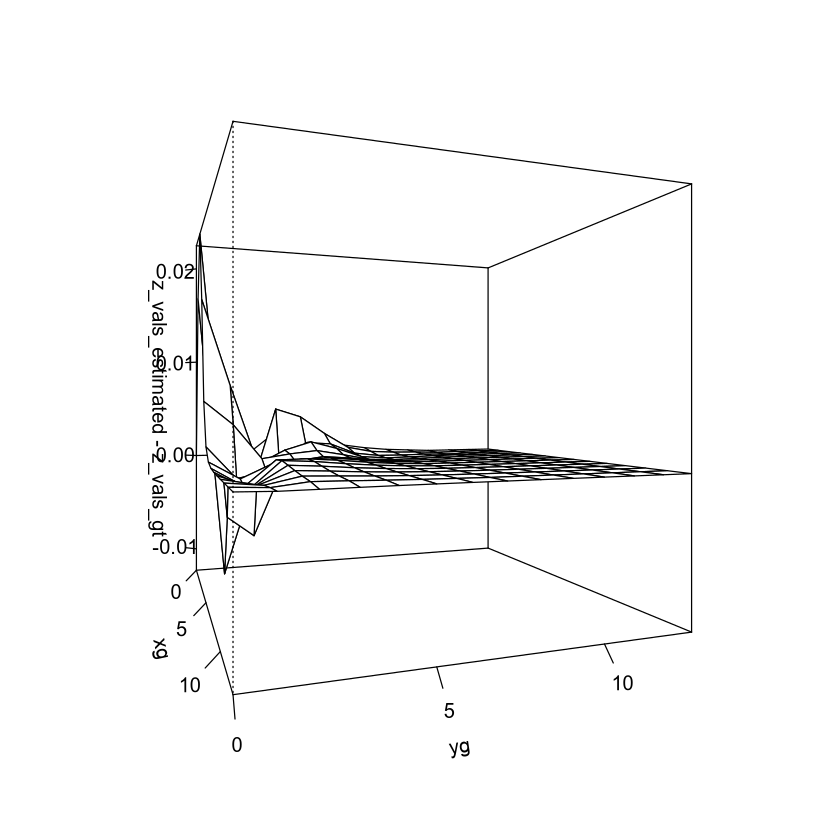

In [72]:
persp(xg, yg, z_vals_estimated-z_vals_gt, theta=70, phi=0, ticktype="detailed")